# Data Exploration 
#### Due Wednesday, December 1st, 2021
#### By Aaliyah Hänni, Vanessa Joy Hsu, Liem Luong, Dwight Sablan


Data Source: *Clothing Pattern Dataset* by Alexander J. Medeiros, Lee Stearns, Leah Findlater, Chuan Chen, and Jon E. Froehlich 
https://github.com/lstearns86/clothing-pattern-dataset

Pattern Types: 
 - Solid
 - Checkered
 - Floral
 - Dotted
 - Striped
 - Zig Zag

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import urllib
from PIL import Image

import requests
from io import BytesIO

import glob, os, cv2

In [12]:
clothingDataset = pd.read_csv('googleClothingDataset.csv')

In [13]:
clothingDataset.head(5)

,Class Name,URL,Original Width,Original Height,Crop X,Crop Y,Crop Width,Crop Height,Scales
0,solid,https://www.publicdomainpictures.net/pictures/...,1920,1280,0,0,1920,1280,0.2474874;0.4949747;0.9899495;1.979899
1,solid,https://c1.staticflickr.com/9/8208/8185035876_...,5456,3064,0,0,5456,3064,0.103389;0.206778;0.4135559;0.8271118;1.654224
2,solid,https://cdn.pixabay.com/photo/2017/08/14/22/24...,3680,2760,0,0,3680,2760,0.1147768;0.2295535;0.459107;0.918214;1.836428
3,solid,https://upload.wikimedia.org/wikipedia/commons...,2816,2112,0,0,2816,2112,0.1499923;0.2999847;0.5999694;1.199939
4,solid,https://c1.staticflickr.com/9/8753/17091052376...,2500,1668,0,0,2500,1668,0.1899184;0.3798367;0.7596735;1.519347


In [14]:
clothingDataset.describe

<bound method NDFrame.describe of      Class Name                                                URL  \
0         solid  https://www.publicdomainpictures.net/pictures/...   
1         solid  https://c1.staticflickr.com/9/8208/8185035876_...   
2         solid  https://cdn.pixabay.com/photo/2017/08/14/22/24...   
3         solid  https://upload.wikimedia.org/wikipedia/commons...   
4         solid  https://c1.staticflickr.com/9/8753/17091052376...   
...         ...                                                ...   
2744    zig zag  https://previews.123rf.com/images/sn333g/sn333...   
2745    zig zag  http://www.sheetworld.com/p_images/sxb3242_W11...   
2746    zig zag  https://www.adamrossfabrics.co.uk/wp-content/u...   
2747    zig zag  https://secure.img2-ag.wfcdn.com/im/41114327/r...   
2748    zig zag  https://thumbs.dreamstime.com/z/green-brown-zi...   

      Original Width  Original Height  Crop X  Crop Y  Crop Width  \
0               1920             1280       0       0   

In [15]:
clothingDataset.dtypes

Class Name         object
URL                object
Original Width      int64
Original Height     int64
Crop X              int64
Crop Y              int64
Crop Width          int64
Crop Height         int64
Scales             object
dtype: object

In [16]:
#display mean sizes
clothingDataset.iloc[:, 2:].mean()

Original Width     926.920698
Original Height    829.368134
Crop X              32.262641
Crop Y              28.966897
Crop Width         859.845035
Crop Height        768.420880
dtype: float64

In [17]:
#display standard deviation of sizes
clothingDataset.iloc[:, 2:].std()

Original Width     833.759767
Original Height    694.660113
Crop X             175.485733
Crop Y             147.425093
Crop Width         769.309842
Crop Height        648.219260
dtype: float64

In [18]:
#minimums
clothingDataset.iloc[:, 2:].min()

Original Width                                                   225
Original Height                                                  225
Crop X                                                             0
Crop Y                                                             0
Crop Width                                                       117
Crop Height                                                      103
Scales             0.05525621;0.1105124;0.2210248;0.4420497;0.884...
dtype: object

In [19]:
#maximums
clothingDataset.iloc[:, 2:].max()

Original Width         6016
Original Height        6088
Crop X                 3150
Crop Y                 3430
Crop Width             6016
Crop Height            6000
Scales             3.075571
dtype: object

In [20]:
clothingDataset.isnull().sum()

Class Name         0
URL                0
Original Width     0
Original Height    0
Crop X             0
Crop Y             0
Crop Width         0
Crop Height        0
Scales             0
dtype: int64

## Extract Images from URL

1. Store list of all URLs in to dataframe
2. Iterate through dataframe:

    - Extract *valid* images
    - Save them to local storage
    - Store the local path name to each image in a dataframe: "Images". The label of each image is a [counter]_[patter type].jpg, example: 01_floral.jpg
    - Store bad URLs in a dataframe: "badURLs"

In [11]:
dataset = clothingDataset.iloc[:, :2].values.tolist()

In [13]:
images = [] #df used to store valid images. Format: pattern, image
badURLs = [] #df used to store invalid images/broken urls. Format: patter, url

dir_base = os.getcwd() + '\\patterns' # Get your current directory & create a new folder 'called patterns'

for i, row in enumerate(dataset): 
    #row[0] = pattern, row[1] = url
    try:
        image_name = '0{}_{}'.format(i+1, "_" + str(row[0]) + '.jpg') # Example: 01_floral.jpg
        urllib.request.urlretrieve(row[1], image_name)
        path = os.path.join(dir_base , image_name)
        images.append([row[0], path])  # adding that locally fetched image path to pandas column

    except Exception:
        badURLs.append([row[0], row[1]])
        continue

In [14]:
#format the images into a dataframe
images = pd.DataFrame(images, columns = ['pattern', 'image'])
badURLs = pd.DataFrame(badURLs, columns = ['pattern', 'url'])

In [15]:
#storing images into a csv, so we don't have to redownload images later
images.to_csv("URL_patterns.csv")

In [16]:
print("Valid Image URLs:   ", len(images))
print("Invalid Image URLs: ", len(badURLs))

Valid Image URLs:    1262
Invalid Image URLs:  1487


In [17]:
print("INVALID IMAGE URLS")
print('')
print("     Solid: ", len(badURLs[badURLs.pattern == 'solid']))
print("     Checkered: ", len(badURLs[badURLs.pattern == 'checkered']))
print("     Floral: ", len(badURLs[badURLs.pattern == 'floral']))
print("     Dotted: ", len(badURLs[badURLs.pattern == 'dotted']))
print("     Striped: ", len(badURLs[badURLs.pattern == 'striped']))
print("     Zig Zag: ", len(badURLs[badURLs.pattern == 'zig zag']))
print('')
print("     Total: ", len(badURLs))

INVALID IMAGE URLS

     Solid:  226
     Checkered:  259
     Floral:  323
     Dotted:  132
     Striped:  340
     Zig Zag:  207

     Total:  1487


In [18]:
print("VALID IMAGE URLS")
print('')
print("     Solid: ", len(images[images.pattern == 'solid']))
print("     Checkered: ", len(images[images.pattern == 'checkered']))
print("     Floral: ", len(images[images.pattern == 'floral']))
print("     Dotted: ", len(images[images.pattern == 'dotted']))
print("     Striped: ", len(images[images.pattern == 'striped']))
print("     Zig Zag: ", len(images[images.pattern == 'zig zag']))
print('')
print("     Total: ", len(images))

VALID IMAGE URLS

     Solid:  193
     Checkered:  233
     Floral:  259
     Dotted:  183
     Striped:  194
     Zig Zag:  200

     Total:  1262


In [19]:
patterns = ['checkered', 'dotted', 'floral', 'solid', 'striped', 'zig zag']
badURL_totals = []
for i in patterns:
    badURL_totals.append([i, len(badURLs[badURLs.pattern == i])])
                          
goodURL_totals = []
for i in patterns:
    goodURL_totals.append([i, len(images[images.pattern == i])])

In [20]:
badURL_totals = pd.DataFrame(badURL_totals, columns = ['pattern', 'total'])
goodURL_totals = pd.DataFrame(goodURL_totals, columns = ['pattern', 'total'])

In [21]:
badURL_totals.total.to_list()

[259, 132, 323, 226, 340, 207]

Text(0, 0.5, 'Image Count')

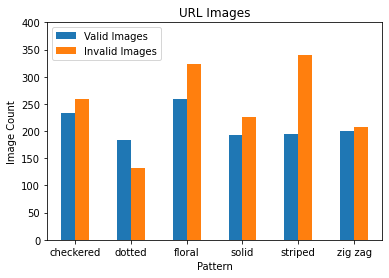

In [22]:
index = patterns
df = pd.DataFrame({'Valid Images': goodURL_totals.total.to_list(), 
                   'Invalid Images': badURL_totals.total.to_list()}, index=index)

ax = df.plot.bar(rot=0)
ax.set_ylim([0, 400])

plt.title('URL Images')

plt.xlabel('Pattern')
plt.ylabel('Image Count')

In [23]:
len(images)

1262

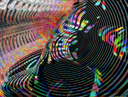

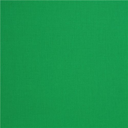

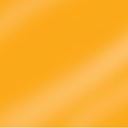

In [24]:
#display images
size = 128, 128 #reshape to thumbnail size
for i in [0, 100, 150]:
    im = Image.open(images.image[i])
    im.thumbnail(size)
    display(im)

## Explore FingerCamera Dataset
Folders:
FingerCamera\[pattern]

patterns: checkered, dotted, floral, solid, striped, zig zag

In [25]:
path = 'FingerCamera/'
PNGimages = []
patterns = ['checkered', 'dotted', 'floral', 'solid', 'striped', 'zig zag']
pattern_counts = []
prev_count = 0
print("PNGs")
for i in patterns:
    PNGimages.extend(glob.glob(path + str(i) + '/*.png'))
    pattern_counts.append(len(PNGimages) - prev_count)
    print(i, "-", len(PNGimages) - prev_count)
    prev_count = len(PNGimages)
    
print("TOTAL -", len(PNGimages))

PNGs
checkered - 88
dotted - 48
floral - 88
solid - 48
striped - 64
zig zag - 64
TOTAL - 400


In [26]:
for i in [0, 100, 150, 250, 300, 350]:
    im = cv2.imread(PNGimages[i])
    print("Image Size: ", im.shape)

Image Size:  (640, 640, 3)
Image Size:  (640, 640, 3)
Image Size:  (640, 640, 3)
Image Size:  (640, 640, 3)
Image Size:  (640, 640, 3)
Image Size:  (640, 640, 3)


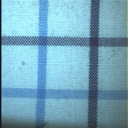

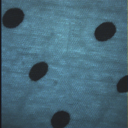

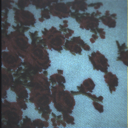

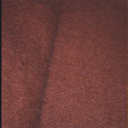

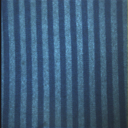

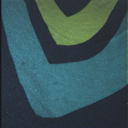

In [27]:
size = 128, 128 #reshape to thumbnail size
for i in [0, 100, 150, 250, 300, 350]:
    im = Image.open(PNGimages[i])
    im.thumbnail(size)
    display(im)

Text(0, 0.5, 'Image Count')

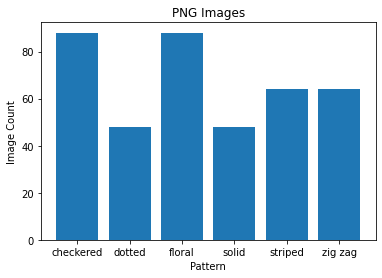

In [28]:
plt.bar(patterns, pattern_counts)
plt.title("PNG Images")
ax.set_ylim([0, 400])
plt.xlabel('Pattern')
plt.ylabel('Image Count')

Text(0, 0.5, 'Image Count')

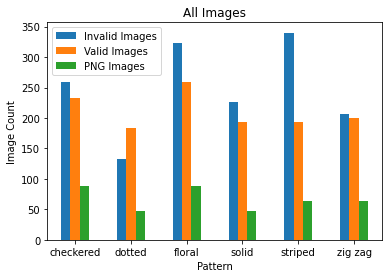

In [29]:
index = patterns
df = pd.DataFrame({'Invalid Images': badURL_totals.total.to_list(),
                   'Valid Images': goodURL_totals.total.to_list(),
                  'PNG Images': pattern_counts}, index=index)

ax = df.plot.bar(rot=0)

plt.title('All Images')
plt.xlabel('Pattern')
plt.ylabel('Image Count')

In [30]:
total_valid = []
for i in range(6):
    total_valid.append(goodURL_totals.total.to_list()[i] + pattern_counts[i])

In [31]:
total_valid

[321, 231, 347, 241, 258, 264]

In [32]:
print("ALL VALID IMAGE (valid URL + PNG)")
for i in range(6):
    print(patterns[i], "-", total_valid[i])
print("Total -", sum(total_valid))

ALL VALID IMAGE (valid URL + PNG)
checkered - 321
dotted - 231
floral - 347
solid - 241
striped - 258
zig zag - 264
Total - 1662


Text(0, 0.5, 'Image Count')

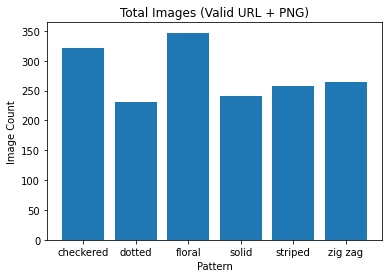

In [33]:
plt.bar(patterns, total_valid)

plt.title('Total Images (Valid URL + PNG)')
plt.xlabel('Pattern')
plt.ylabel('Image Count')

## After images are locallying installed

In [50]:
images = []
corrupted_images = []
for filename in glob.glob('*.jpg'): #enter local file path
    try:
        im = Image.open(filename)
        name = os.path.basename(filename)
        if name[-7:] == 'ted.jpg':
            pattern = 'dotted'
        elif name[-7:] == 'red.jpg':
            pattern = 'checkered'
        elif name[-7:] == 'lid.jpg':
            pattern = 'solid'
        elif name[-7:] == 'ral.jpg':
            pattern = 'floral'
        elif name[-7:] == 'zag.jpg':
            pattern = 'zig_zag'    
        elif name[-7:] == 'ped.jpg':
            pattern = 'striped'  
        images.append([name, pattern])
    except Exception:
        corrupted_images.append(filename)

    
print("Valid Images: ", len(images))
print("Corrupted Images: ", len(corrupted_images))

Valid Images:  1229
Corrupted Images:  32


## Future Work
* center URL images using Crop X & Crop Y
* crop URL images using Crop Width & Crop Height
* create a dataframe of PNG locations and pattern type
* resize all PNG images to 224 x 224 (to match cropped URLs)
* merge together dataframes into a singel set of all images

## Cited Sources
* https://github.com/lstearns86/clothing-pattern-dataset 

* https://www.kite.com/python/answers/how-to-read-an-image-data-from-a-url-in-python
* https://pillow.readthedocs.io/en/stable/reference/Image.html


* https://datascience.stackexchange.com/questions/58351/how-to-retrieve-images-from-a-url-in-a-pandas-dataframe-and-store-them-as-pil-ob

* https://stackoverflow.com/questions/46107348/how-to-display-image-stored-in-pandas-dataframe

* https://www.codegrepper.com/code-examples/python/python+load+all+images+from+folder

* https://www.py4u.net/discuss/151260